# Detecting Credit Card Fraud with Machine Learning
## MSDS 5506 Data Mining Project


## Data Import from Kaggle

In [4]:

import pandas as pd
import kagglehub
import numpy as np
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

C:\Users\spencer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Import the dataset from kaggle
# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\spencer\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [6]:
df = pd.read_csv(path+"/creditcard.csv")

## I. Data Understanding
Go through some steps to gain deeper understanding of the data structure and challenges. See if any features might be obvious candidates for models.  The data has been anonymized so we don't know what the features are, but we do know that they have been scaled already.

### i. Initial Data Inspection

In [7]:
# look at the head and tail of the data quick
# check to see the data structure, col names, and initial values
print(df.head())
print(df.tail())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
# see if there are any missing values and ensure columns are of the correct datatype
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# get descriptive statistics for numerical columns to understand the distribution, scale, and potential outliers
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

The 'Time' and 'Amount' scales are different from the 'v' features, which are normalized by PCA from whoever provided the dataset.  The mean purchase amount in this dataset is $88.35.  There are no null values, so we don't need to deal with missing data.

### ii. Target Variable Analysis

In [10]:
# Confirm the severe class imbalance
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100) # Percent

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


### iii. Feature Analysis (Time, Amount, and PCA-Components)

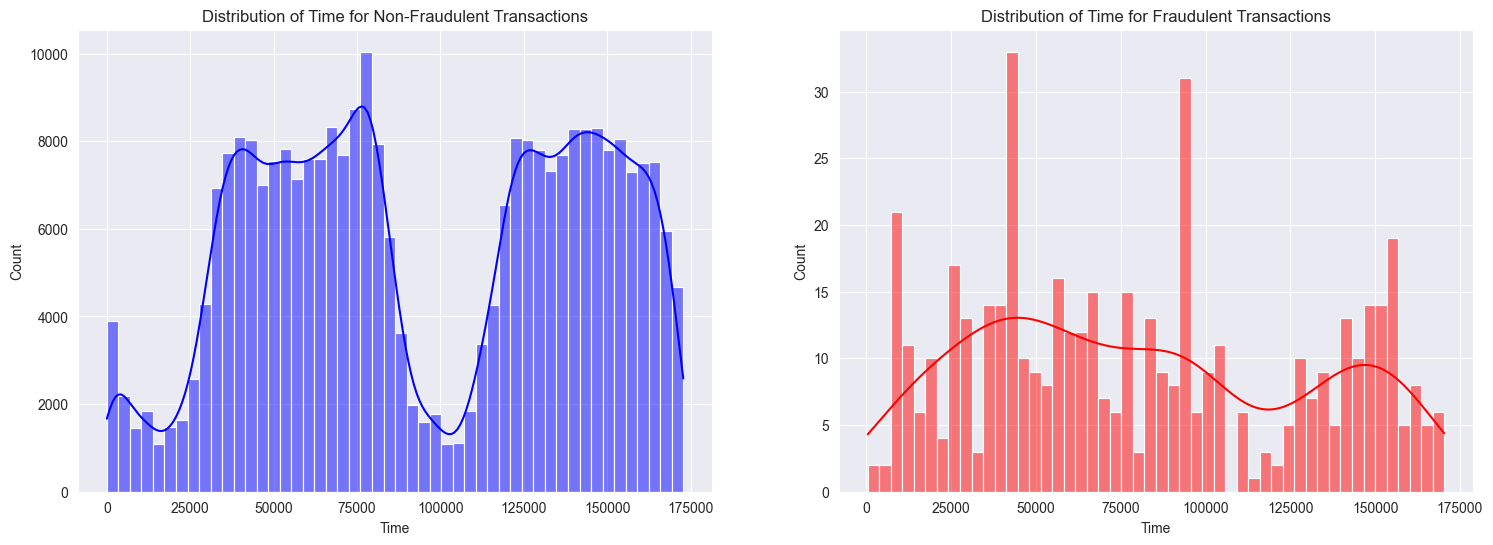

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Time for both classes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df['Time'][df['Class'] == 0], bins=50, ax=ax1, color='blue', kde=True)
ax1.set_title('Distribution of Time for Non-Fraudulent Transactions')
sns.histplot(df['Time'][df['Class'] == 1], bins=50, ax=ax2, color='red', kde=True)
ax2.set_title('Distribution of Time for Fraudulent Transactions')
plt.show()

Insight: the distribution of time for fraudulent transactions appears to be more uniform than non-fraud (during the day)

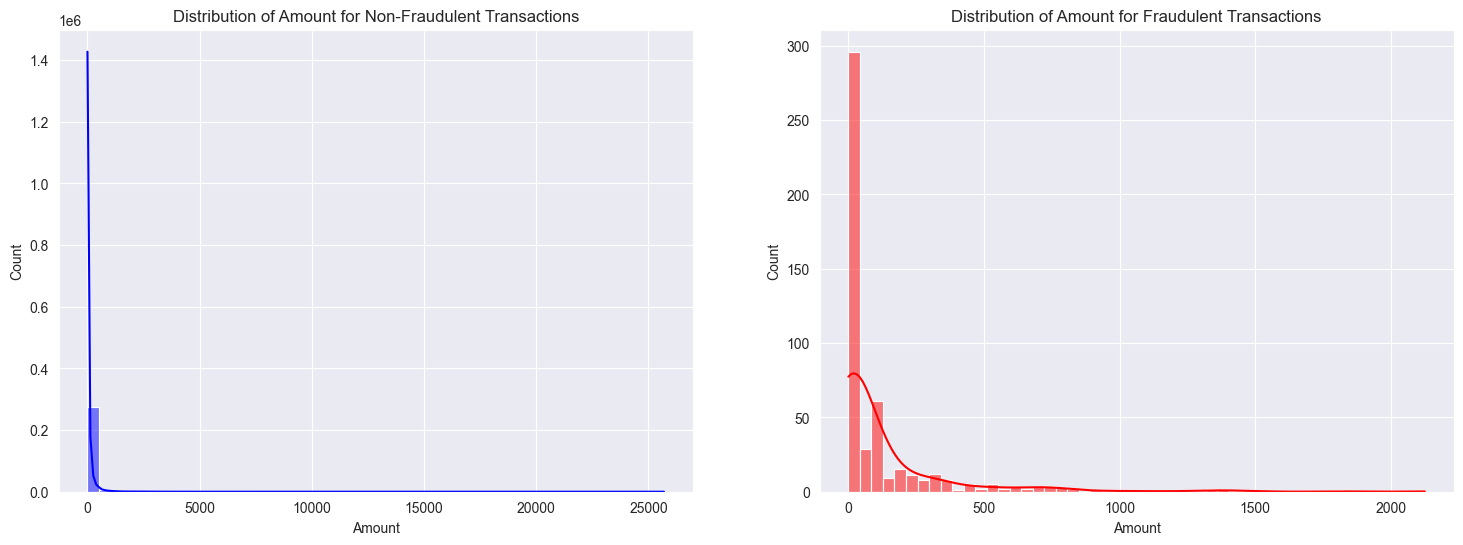

C:\Users\spencer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


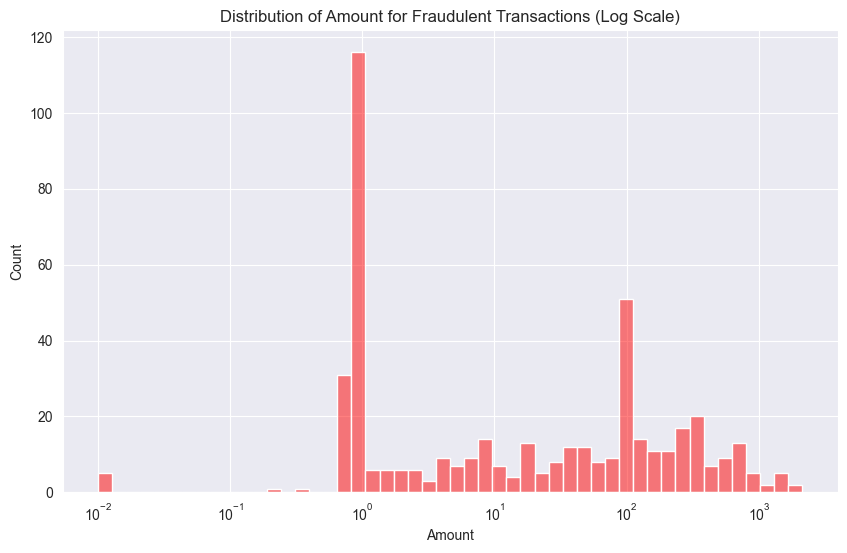

In [12]:
# Distribution of Amount for both classes

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df['Amount'][df['Class'] == 0], bins=50, ax=ax1, color='blue', kde=True)
ax1.set_title('Distribution of Amount for Non-Fraudulent Transactions')
sns.histplot(df['Amount'][df['Class'] == 1], bins=50, ax=ax2, color='red', kde=True)
ax2.set_title('Distribution of Amount for Fraudulent Transactions')
plt.show()

# Zoom in on smaller amounts for fraud, as most fraud amounts are small
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'][df['Class'] == 1], bins=50, color='red', kde=True, log_scale=True) # Log scale for better visualization of small amounts
plt.title('Distribution of Amount for Fraudulent Transactions (Log Scale)')
plt.show()

Insight: fraud appears to be smaller amounts.

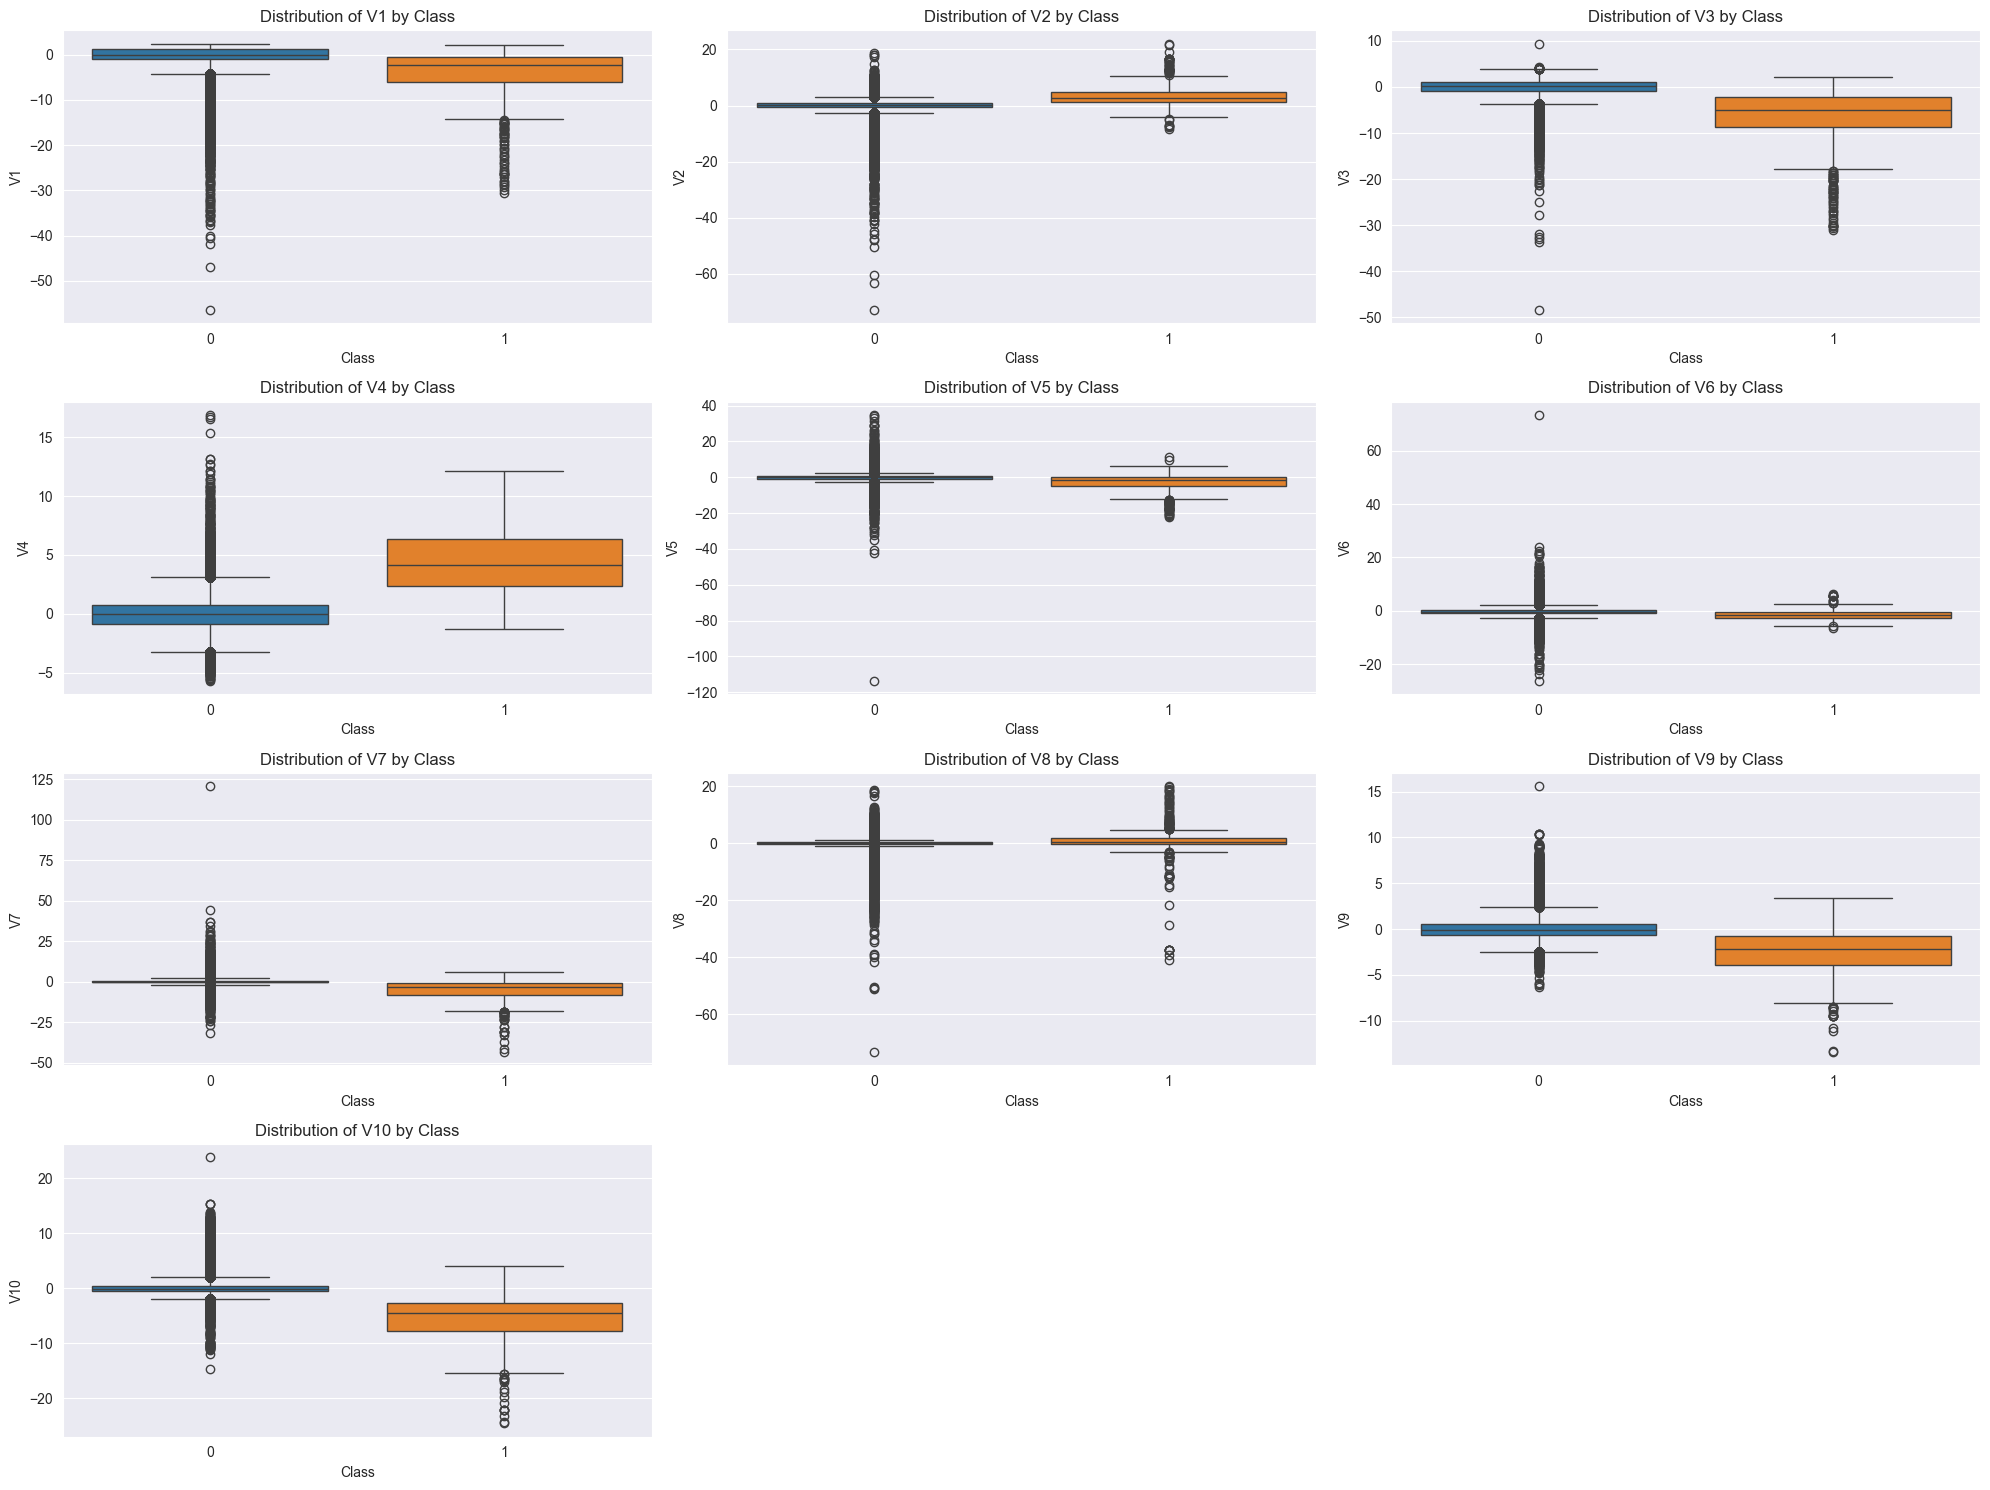

In [13]:
# Visualize a few features
v_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
plt.figure(figsize=(20, 15))
for i, col in enumerate(v_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=df, hue='Class', legend = False)
    plt.title(f'Distribution of {col} by Class')
plt.tight_layout()
plt.show()

Insights: Can't infer meaning because they are anonymized, but you can visually identify if any show a clear difference in distribution between the classes.  Maybe those are stronger predictors.  Need to look at the rest of them.

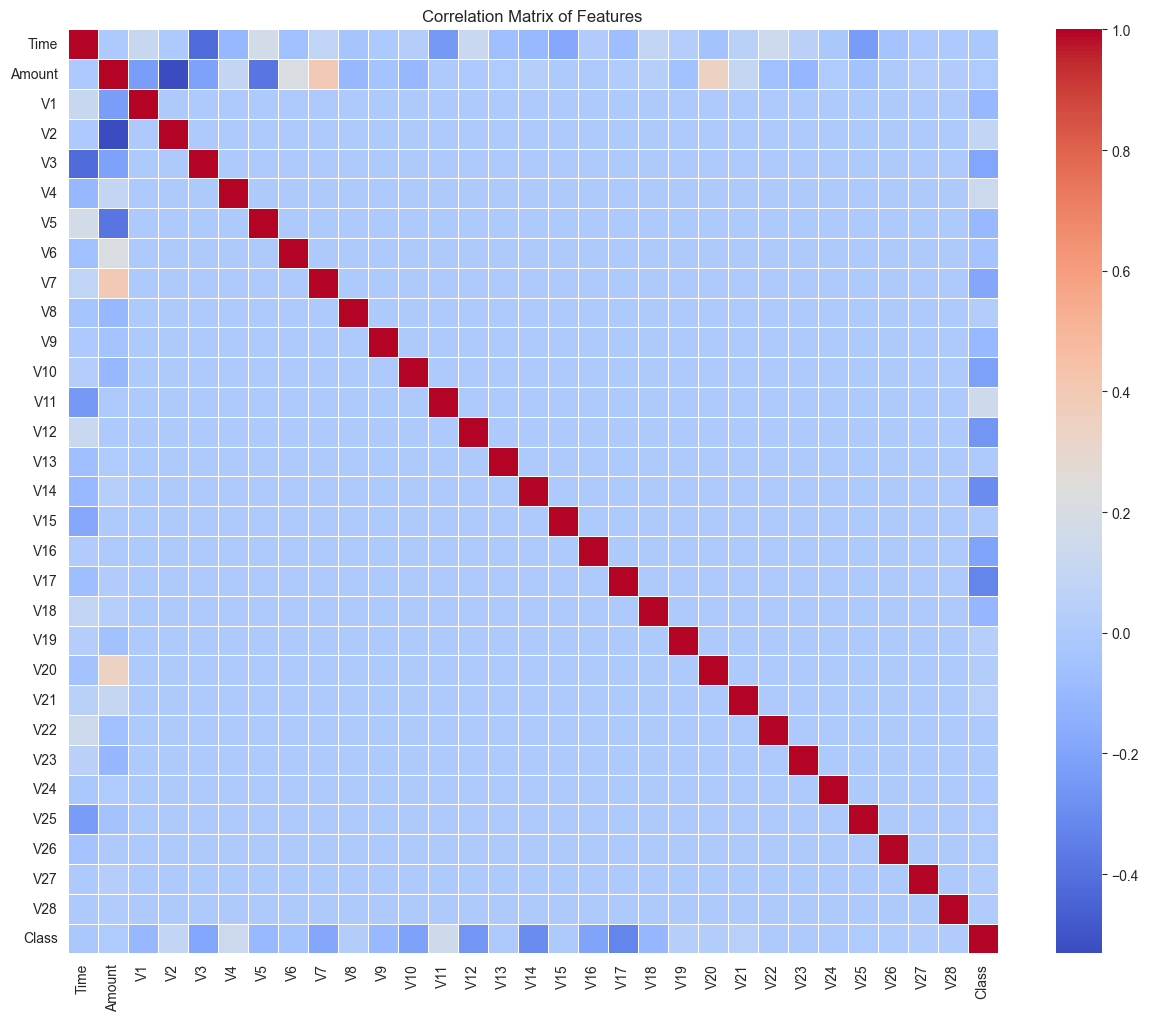

In [14]:
# See how features correlate with each other and the Class variable

plt.figure(figsize=(15, 12))
# Select relevant features, potentially including Time, Amount, and V-features that showed differences
correlation_features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)] + ['Class']
corr_matrix = df[correlation_features].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5) # Remove annot=True for large matrices
plt.title('Correlation Matrix of Features')
plt.show()

Insight: features that are highly correlated with class variable could be good candidates for models.  These are PCA components so they should correlate very close to zero with each other.  Really just Time and Amount are of interest.

### iv. Outlier Detection

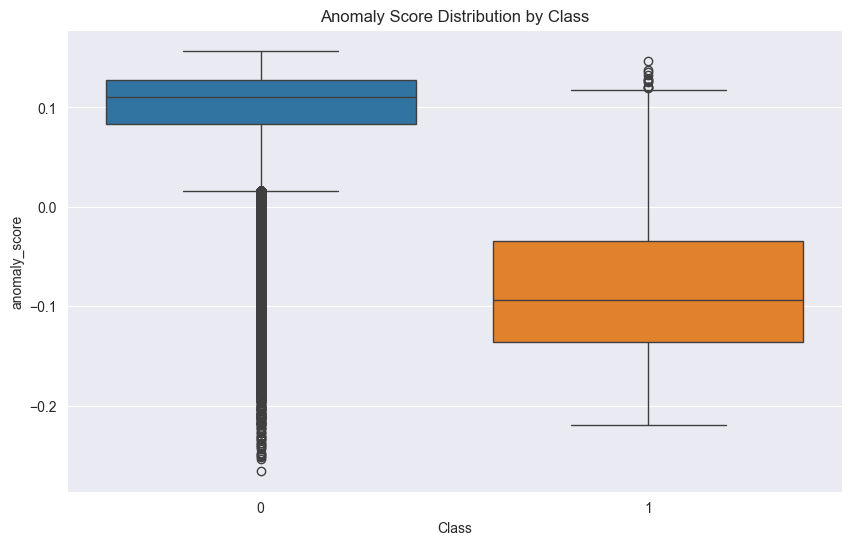

In [15]:
# Box plots for 'Amount' using Isolation Forest
# unsupervised method to see if we can identify anomalous transactions even before a supervised model.
# see if fraud inherently appear as anomalous even w/o being explicitly told so.
from sklearn.ensemble import IsolationForest

# Train on a subset of features or on the entire dataset
# This is more for identifying anomalies, not directly for fraud.
# For a quick EDA, you could train on non-fraudulent data and see what it flags in fraud.
model = IsolationForest(random_state=0)
# Fit on non-fraud data to learn 'normal' patterns
model.fit(df[df['Class'] == 0].drop('Class', axis=1))
df['anomaly_score'] = model.decision_function(df.drop('Class', axis=1))

# Compare anomaly scores for fraud vs. non-fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='anomaly_score', data=df, hue='Class', legend=False)
plt.title('Anomaly Score Distribution by Class')
plt.show()

### v. Dimensionality Reduction for Visualization



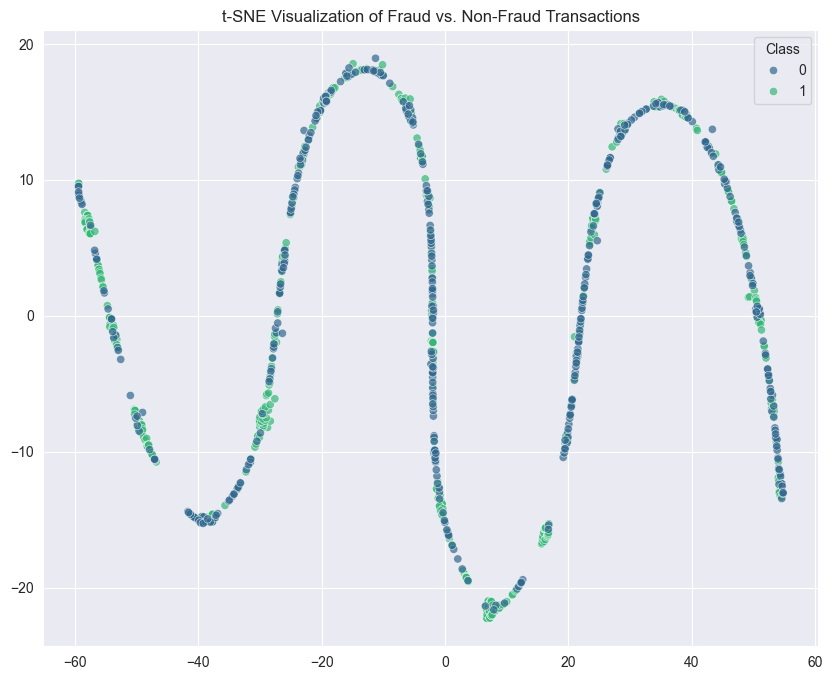

In [16]:
#t-SNE to visualize high dimension data in 2D or 3D. sampling to avoid too much computational intensity.
# get a visual of fraudulent transactions 'clustering'
from sklearn.manifold import TSNE

n_samples_fraud = df[df['Class'] == 1].shape[0]
df_fraud = df[df['Class'] == 1]
df_non_fraud = df[df['Class'] == 0].sample(n=n_samples_fraud, random_state=0) # Sample equal non-fraud
df_subset = pd.concat([df_fraud, df_non_fraud])

X_subset = df_subset.drop('Class', axis=1)
y_subset = df_subset['Class']

tsne = TSNE(n_components=2, random_state=0, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_subset, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Fraud vs. Non-Fraud Transactions')
plt.show()

Insight: the clustering of the fraudulent transactions suggests that the classes are separable.

## II. Data Preprocessing
Verify no null values, check for duplicate rows, Separate features and target variables, perform train-test split, apply feature scaling to 'Time' and 'Amount' after splitting (other features are already scaled), apply imbalance handling technique (only on training data).

In [17]:
print(df.isnull().sum().sum())

0


In [18]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows before removal: 1081
Number of rows after removing duplicates: 283726


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# Split data into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']

# set stratify to y because of the extreme class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(f"Train set - Non-fraud: {y_train.value_counts()[0]}, Fraud: {y_train.value_counts()[1]}")
print(f"Test set - Non-fraud: {y_test.value_counts()[0]}, Fraud: {y_test.value_counts()[1]}")

# Initialize RobustScaler
rob_scaler = RobustScaler()
scaler = StandardScaler()

# Fit on X_train's 'Amount' and 'Time', then transform both train and test
X_train['Amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = rob_scaler.transform(X_test['Amount'].values.reshape(-1, 1))

X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1, 1))

print(X_train.head())
print(X_test.head())


Train set - Non-fraud: 226602, Fraud: 378
Test set - Non-fraud: 56651, Fraud: 95
            Time        V1        V2        V3        V4        V5        V6  \
277710  1.538226 -0.672422  1.064426  0.169425 -0.956318  1.592661 -1.022882   
149099 -0.087373  1.289019 -1.399134 -0.336253  0.847270 -0.756212  0.621076   
1862   -1.964567 -1.220437  1.400026  1.220500 -0.782538 -0.229006 -0.938550   
274455  1.500455  2.266021 -1.080966 -1.969647 -2.859968 -0.300653 -0.857595   
185369  0.671329 -4.261556 -3.941993 -0.789632 -2.606388  2.822660  2.728412   

              V7        V8        V9  ...       V21       V22       V23  \
277710  1.727472 -0.380117 -0.892937  ...  0.091072  0.215606 -0.686870   
149099 -0.459826  0.085696  2.769293  ... -0.103316 -0.434800  0.059417   
1862    0.727396 -0.000388  0.628770  ... -0.288077 -0.475916 -0.042510   
274455 -0.326369 -0.402087  1.019874  ... -0.059112  0.668358 -0.130834   
185369 -0.168965  1.592447  0.250990  ...  0.367567 -1.081691  

In [35]:
# Random oversampling dataset
# --- 1. Apply Random Oversampling ---
from imblearn.over_sampling import RandomOverSampler # The key for this method
from collections import Counter

print(f"\nTraining set class distribution before RandomOverSampler: {Counter(y_train)}")

# Initialize RandomOverSampler
# By default, RandomOverSampler oversamples the minority class to match the size of the majority class.
ros = RandomOverSampler(random_state=0)
X_train_resampled_ros, y_train_resampled_ros = ros.fit_resample(X_train, y_train)

print(f"Training set class distribution after RandomOverSampler: {Counter(y_train_resampled_ros)}")


Training set class distribution before RandomOverSampler: Counter({0: 226602, 1: 378})
Training set class distribution after RandomOverSampler: Counter({0: 226602, 1: 226602})


Next handle the class imbalance.  Use SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples of the minority class based on its nearest neighbors (oversample minority class).  This is a common method used, but we could also use random oversampling or Adaptive Synthetic Sampling methods.  We could also undersample the majority class or some combination of the two.  I want to revisit this step using a SMOTE + Tomek Links combination.

In [20]:
# SMOTE oversampling
from imblearn.over_sampling import SMOTE

print(f"Original training set shape: {X_train.shape}, Class distribution: {Counter(y_train)}")

smote = SMOTE(sampling_strategy='auto', random_state=0) # 'auto' attempts to balance classes, we can experiment with other strategies to see which works best based on evaluation metrics.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"SMOTE Resampled training set shape: {X_train_resampled.shape}, Class distribution: {Counter(y_train_resampled)}")

Original training set shape: (226980, 31), Class distribution: Counter({0: 226602, 1: 378})
SMOTE Resampled training set shape: (453204, 31), Class distribution: Counter({0: 226602, 1: 226602})


In [50]:
from imblearn.under_sampling import TomekLinks

# Apply SMOTETomek to the training data
print(f"\nTraining set class distribution before SMOTETomek: {Counter(y_train)}")

# Initialize SMOTETomek
# By default, SMOTETomek aims for a 1:1 ratio after resampling
# You can customize `smote` and `tomek` parameters if needed, e.g.,
smote_instance = SMOTE(sampling_strategy=0.5) # Oversample minority to 50% of majority
tomek_instance = TomekLinks(sampling_strategy='majority') # Only remove majority class from Tomek links
smt = SMOTETomek(smote=smote_instance, tomek=tomek_instance, random_state=0)

#smt = SMOTETomek(random_state=0)
X_train_resampled_smt, y_train_resampled_smt = smt.fit_resample(X_train, y_train)

print(f"Training set class distribution after SMOTETomek: {Counter(y_train_resampled)}")


Training set class distribution before SMOTETomek: Counter({0: 226602, 1: 378})
Training set class distribution after SMOTETomek: Counter({0: 226602, 1: 226602})


In [47]:
# apply random undersampling to the training data
from imblearn.under_sampling import RandomUnderSampler

print(f"\nTraining set class distribution before undersampling: {Counter(y_train)}")

rus = RandomUnderSampler(random_state=0)
X_train_resampled_rus, y_train_resampled_rus = rus.fit_resample(X_train, y_train)

print(f"Training set class distribution after undersampling: {Counter(y_train_resampled_rus)}")


Training set class distribution before undersampling: Counter({0: 226602, 1: 378})
Training set class distribution after undersampling: Counter({0: 378, 1: 378})


At this point, our data is ready for model building!

## III. Data Modeling
Based on my research, it appears that models that are better for optimizing around Recall include Logistic Regression, Ensemble Methods, SVMs, and Neural Networks.  Hyperparameter tuning and threshold adjustments will likely have a major impact on getting the best results.  First, I'll start with a Logistic Regression model, then build a Random Forest with class weights.  Then, I'll fit an XGBoost Classifier.

### Logistic Regression


--- Logistic Regression Baseline Model Evaluation ---
Recall: 0.9053
Precision: 0.0512
F1-Score: 0.0969

Confusion Matrix:
[[55057  1594]
 [    9    86]]
  Actual 0   Actual 1
Pred 0: 55057      1594       (True Negatives, False Positives)
Pred 1: 9          86         (False Negatives, True Positives)


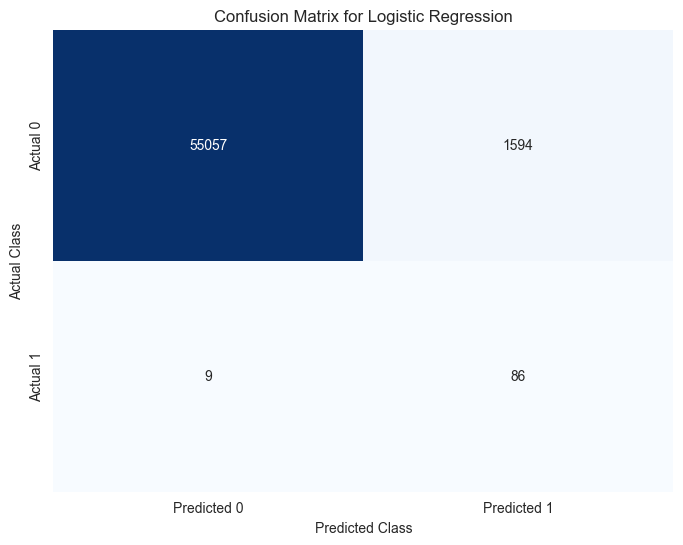

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, precision_recall_curve, auc

log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)
log_reg.fit(X_train_resampled_smt, y_train_resampled_smt)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1] # Probabilities for the positive class (fraud)

# Calculate evaluation metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n--- Logistic Regression Baseline Model Evaluation ---")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)
print("  Actual 0   Actual 1")
print(f"Pred 0: {conf_matrix[0,0]:<10} {conf_matrix[0,1]:<10} (True Negatives, False Positives)")
print(f"Pred 1: {conf_matrix[1,0]:<10} {conf_matrix[1,1]:<10} (False Negatives, True Positives)")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Logistic Regression model achieves decent recall, but precision is lower than I'd like as it flags valid transactions as fraud.

### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
# !!!this cell takes ~8 min to execute!!!
# --- 1. Random Forest with Class Weights ---
print("\n--- Random Forest with Class Weights ---")
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
rf_clf.fit(X_train_resampled_smt, y_train_resampled_smt)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print(f"Recall (RF): {recall_score(y_test, y_pred_rf):.4f}")
print(f"Precision (RF): {precision_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score (RF): {f1_score(y_test, y_pred_rf):.4f}")


--- Random Forest with Class Weights ---
Recall (RF): 0.8316
Precision (RF): 0.9405
F1-Score (RF): 0.8827


In [42]:
# !!!this cell takes 15 min to execute!!!
# --- 1. Random Forest with Class Weights ---
print("\n--- Random Forest with Class Weights ---")
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train_resampled, y_train_resampled) # Using resampled data for training

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print(f"Recall (RF): {recall_score(y_test, y_pred_rf):.4f}")
print(f"Precision (RF): {precision_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score (RF): {f1_score(y_test, y_pred_rf):.4f}")


--- Random Forest with Class Weights ---
Recall (RF): 0.8316
Precision (RF): 0.9405
F1-Score (RF): 0.8827


In [36]:
# !!!this cell takes ~4 min to execute!!!
# --- 1. Random Forest with Class Weights ---
print("\n--- Random Forest with Class Weights ---")
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
rf_clf_2 = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
rf_clf_2.fit(X_train, y_train) # Using resampled data for training

y_pred_rf_2 = rf_clf_2.predict(X_test)
y_proba_rf_2 = rf_clf_2.predict_proba(X_test)[:, 1]

print(f"Recall (RF): {recall_score(y_test, y_pred_rf_2):.4f}")
print(f"Precision (RF): {precision_score(y_test, y_pred_rf_2):.4f}")
print(f"F1-Score (RF): {f1_score(y_test, y_pred_rf_2):.4f}")


--- Random Forest with Class Weights ---
Recall (RF): 0.7789
Precision (RF): 0.9737
F1-Score (RF): 0.8655



Confusion Matrix:
[[56646     5]
 [   16    79]]
  Actual 0   Actual 1
Pred 0: 56646      5          (True Negatives, False Positives)
Pred 1: 16         79         (False Negatives, True Positives)


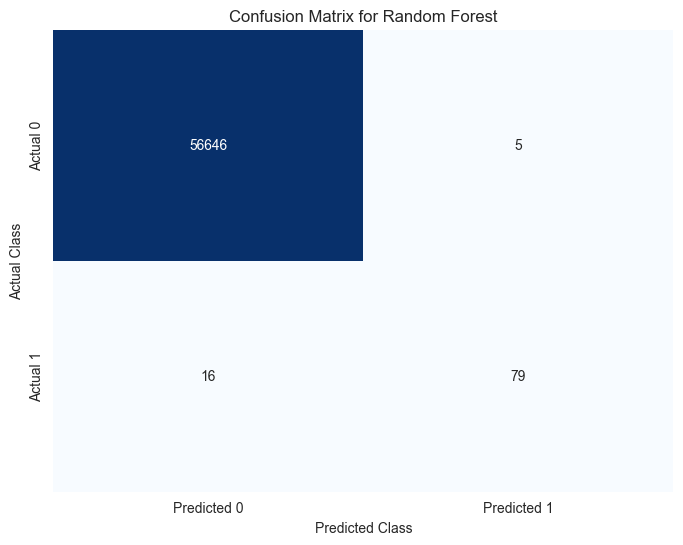

In [33]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("  Actual 0   Actual 1")
print(f"Pred 0: {conf_matrix_rf[0,0]:<10} {conf_matrix_rf[0,1]:<10} (True Negatives, False Positives)")
print(f"Pred 1: {conf_matrix_rf[1,0]:<10} {conf_matrix_rf[1,1]:<10} (False Negatives, True Positives)")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Random Forest thoughts...

### XGBoost


--- XGBoost with scale_pos_weight ---
Calculated scale_pos_weight: 2.00
Recall (XGBoost): 0.8421
Precision (XGBoost): 0.7407
F1-Score (XGBoost): 0.7882

Confusion Matrix:
[[56623    28]
 [   15    80]]
  Actual 0   Actual 1
Pred 0: 56623      28         (True Negatives, False Positives)
Pred 1: 15         80         (False Negatives, True Positives)


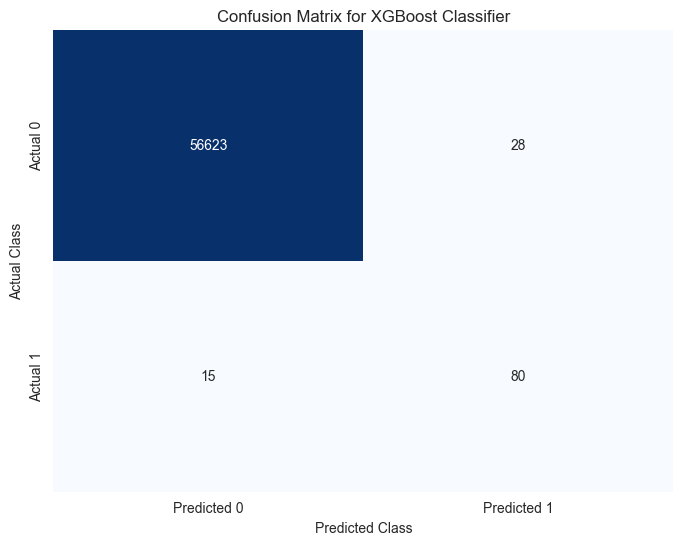

In [51]:
print("\n--- XGBoost with scale_pos_weight ---")
from xgboost import XGBClassifier

# Calculate scale_pos_weight for XGBoost
scale_pos_weight = y_train_resampled_smt.value_counts()[0] / y_train_resampled_smt.value_counts()[1]
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

xgb_clf = XGBClassifier(n_estimators=100, random_state=0, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
xgb_clf.fit(X_train_resampled_smt, y_train_resampled_smt)

y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print(f"Recall (XGBoost): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"Precision (XGBoost): {precision_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score (XGBoost): {f1_score(y_test, y_pred_xgb):.4f}")

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("  Actual 0   Actual 1")
print(f"Pred 0: {conf_matrix_xgb[0,0]:<10} {conf_matrix_xgb[0,1]:<10} (True Negatives, False Positives)")
print(f"Pred 1: {conf_matrix_xgb[1,0]:<10} {conf_matrix_xgb[1,1]:<10} (False Negatives, True Positives)")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


--- Decision Threshold Adjustment (Example with XGBoost) ---

Optimal threshold for recall >= 0.86: 0.6726
Recall (XGBoost, tuned threshold): 0.8632
Precision (XGBoost, tuned threshold): 0.8542
F1-Score (XGBoost, tuned threshold): 0.8586

Confusion Matrix:
[[56637    14]
 [   13    82]]
  Actual 0   Actual 1
Pred 0: 56637      14         (True Negatives, False Positives)
Pred 1: 13         82         (False Negatives, True Positives)


Text(0.5, 36.72222222222221, 'Predicted Class')

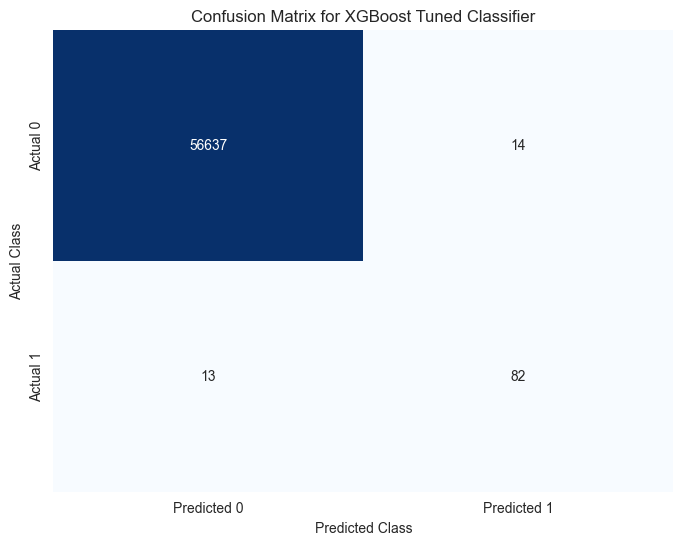

In [28]:
# Decision Threshold Adjustment
# Find threshold for a target recall
print("\n--- Decision Threshold Adjustment (Example with XGBoost) ---")
target_recall = 0.86

# XGBoost Precision-Recall Curve
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recalls_xgb, precisions_xgb)

# Find the index where recall first drops below target_recall
idx = np.where(recalls_xgb >= target_recall)[0][-1]
optimal_threshold = thresholds_xgb[idx]

print(f"\nOptimal threshold for recall >= {target_recall}: {optimal_threshold:.4f}")

# Re-evaluate with new threshold
y_pred_xgb_tuned = (y_proba_xgb >= optimal_threshold).astype(int)
print(f"Recall (XGBoost, tuned threshold): {recall_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"Precision (XGBoost, tuned threshold): {precision_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"F1-Score (XGBoost, tuned threshold): {f1_score(y_test, y_pred_xgb_tuned):.4f}")

conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

print("\nConfusion Matrix:")
print(conf_matrix_xgb_tuned)
print("  Actual 0   Actual 1")
print(f"Pred 0: {conf_matrix_xgb_tuned[0,0]:<10} {conf_matrix_xgb_tuned[0,1]:<10} (True Negatives, False Positives)")
print(f"Pred 1: {conf_matrix_xgb_tuned[1,0]:<10} {conf_matrix_xgb_tuned[1,1]:<10} (False Negatives, True Positives)")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for XGBoost Tuned Classifier')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

We found several models that have similar recall and precision scores, and we've figured out how to choose threshold that gives the desired outcome of these metrics.

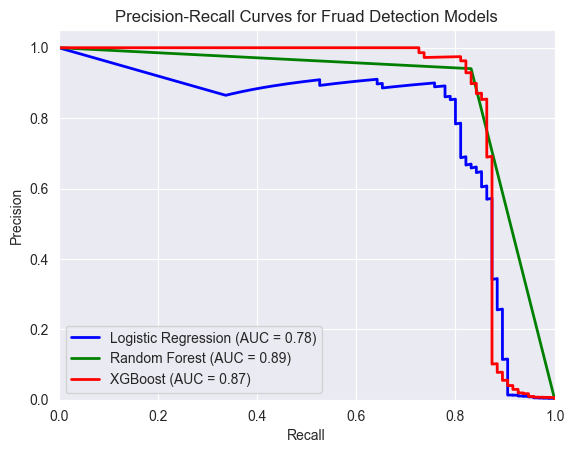


--- Precision-Recall AUC Scores Summary ---
Logistic Regression PR AUC: 0.7844
Random Forest PR AUC: 0.8862
XGBoost PR AUC: 0.8672


In [27]:
# Logistic Regression Precision-Recall Curve

precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_test, y_proba)
pr_auc_lr = auc(recalls_lr, precisions_lr)
plt.plot(recalls_lr, precisions_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')

# Random Forest Precision-Recall Curve
precisions_rf, recalls_rf, _ = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = auc(recalls_rf, precisions_rf)
plt.plot(recalls_rf, precisions_rf, color = 'green', lw=2, label=f'Random Forest (AUC = {pr_auc_rf:.2f})')

plt.plot(recalls_xgb, precisions_xgb, color='red', lw=2, label=f'XGBoost (AUC = {pr_auc_xgb:.2f})')

# Set up plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Precision-Recall Curves for Fraud Detection Models')
plt.grid(True)
plt.show()

print("\n--- Precision-Recall AUC Scores Summary ---")
print(f"Logistic Regression PR AUC: {pr_auc_lr:.4f}")
print(f"Random Forest PR AUC: {pr_auc_rf:.4f}")
print(f"XGBoost PR AUC: {pr_auc_xgb:.4f}")